In [1]:
import requests
import os
from io import StringIO
import sys
!{sys.executable} -m pip install matplotlib matplotlib pandas

import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

  Using cached matplotlib-3.3.4-cp38-cp38-manylinux1_x86_64.whl (11.6 MB)
  Using cached pandas-1.2.3-cp38-cp38-manylinux1_x86_64.whl (9.7 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp38-cp38-manylinux1_x86_64.whl (1.2 MB)
  Using cached numpy-1.20.1-cp38-cp38-manylinux2010_x86_64.whl (15.4 MB)
  Using cached Pillow-8.1.2-cp38-cp38-manylinux1_x86_64.whl (2.2 MB)


In [2]:
kreis = "MüNSTer"
kennwert = "rateM7Tage"
output_file = "output.jpg"

In [3]:
regions = [
{"name": "NRW", "gkz": "5", "regbez": "null", "typ": "ein Bundesland", "datei": "5000.csv", "einwohner": "17947221", "pre": "in", "level": 0, "summaryAddOnText": ""},

{"name": "Düsseldorf", "gkz": "5111", "regbez": "Düsseldorf", "typ": "eine krfr. Stadt", "datei": "daten_5111.csv", "einwohner": "621877" , "pre": "in", "level": 3},
{"name": "Duisburg", "gkz": "5112", "regbez": "Düsseldorf", "typ": "eine krfr. Stadt", "datei": "daten_5112.csv", "einwohner": "498686" , "pre": "in", "level": 3},
{"name": "Essen", "gkz": "5113", "regbez": "Düsseldorf", "typ": "eine krfr. Stadt", "datei": "daten_5113.csv", "einwohner": "582760" , "pre": "in", "level": 3},
{"name": "Krefeld", "gkz": "5114", "regbez": "Düsseldorf", "typ": "eine krfr. Stadt", "datei": "daten_5114.csv", "einwohner": "227417" , "pre": "in", "level": 3},
{"name": "Mönchengladbach", "gkz": "5116", "regbez": "Düsseldorf", "typ": "eine krfr. Stadt", "datei": "daten_5116.csv", "einwohner": "261034" , "pre": "in", "level": 3},
{"name": "Mülheim", "gkz": "5117", "regbez": "Düsseldorf", "typ": "eine krfr. Stadt", "datei": "daten_5117.csv", "einwohner": "170632" , "pre": "in", "level": 3},
{"name": "Oberhausen", "gkz": "5119", "regbez": "Düsseldorf", "typ": "eine krfr. Stadt", "datei": "daten_5119.csv", "einwohner": "210764" , "pre": "in", "level": 3},
{"name": "Remscheid", "gkz": "5120", "regbez": "Düsseldorf", "typ": "eine krfr. Stadt", "datei": "daten_5120.csv", "einwohner": "111338" , "pre": "in", "level": 3},
{"name": "Solingen", "gkz": "5122", "regbez": "Düsseldorf", "typ": "eine krfr. Stadt", "datei": "daten_5122.csv", "einwohner": "159245" , "pre": "in", "level": 3},
{"name": "Wuppertal", "gkz": "5124", "regbez": "Düsseldorf", "typ": "eine krfr. Stadt", "datei": "daten_5124.csv", "einwohner": "355100" , "pre": "in", "level": 3},
{"name": "Kleve", "gkz": "5154", "regbez": "Düsseldorf", "typ": "ein Landkreis", "datei": "daten_5154.csv", "einwohner": "312465" , "pre": "in", "level": 3},
{"name": "Mettmann", "gkz": "5158", "regbez": "Düsseldorf", "typ": "ein Landkreis", "datei": "daten_5158.csv", "einwohner": "485570" , "pre": "in", "level": 3},
{"name": "Rhein-Kreis Neuss", "gkz": "5162", "regbez": "Düsseldorf", "typ": "ein Landkreis", "datei": "daten_5162.csv", "einwohner": "451730" , "pre": "im", "level": 3},
{"name": "Viersen", "gkz": "5166", "regbez": "Düsseldorf", "typ": "ein Landkreis", "datei": "daten_5166.csv", "einwohner": "298863" , "pre": "in", "level": 3},
{"name": "Wesel", "gkz": "5170", "regbez": "Düsseldorf", "typ": "ein Landkreis", "datei": "daten_5170.csv", "einwohner": "459976" , "pre": "in", "level": 3},
{"name": "Bonn", "gkz": "5314", "regbez": "Köln", "typ": "eine krfr. Stadt", "datei": "daten_5314.csv", "einwohner": "329673" , "pre": "in", "level": 3},
{"name": "Köln", "gkz": "5315", "regbez": "Köln", "typ": "eine krfr. Stadt", "datei": "daten_5315.csv", "einwohner": "1087863" , "pre": "in", "level": 3},
{"name": "Leverkusen", "gkz": "5316", "regbez": "Köln", "typ": "eine krfr. Stadt", "datei": "daten_5316.csv", "einwohner": "163729" , "pre": "in", "level": 3},
{"name": "Aachen (Städteregion)", "gkz": "5334", "regbez": "Köln", "typ": "eine Städteregion", "datei": "daten_5334.csv", "einwohner": "557026" , "pre": "in", "level": 3},
{"name": "Düren", "gkz": "5358", "regbez": "Köln", "typ": "ein Landkreis", "datei": "daten_5358.csv", "einwohner": "264638" , "pre": "in", "level": 3},
{"name": "Rhein-Erft-Kreis", "gkz": "5362", "regbez": "Köln", "typ": "ein Landkreis", "datei": "daten_5362.csv", "einwohner": "470615" , "pre": "im", "level": 3},
{"name": "Euskirchen", "gkz": "5366", "regbez": "Köln", "typ": "ein Landkreis", "datei": "daten_5366.csv", "einwohner": "193656" , "pre": "in", "level": 3},
{"name": "Heinsberg", "gkz": "5370", "regbez": "Köln", "typ": "ein Landkreis", "datei": "daten_5370.csv", "einwohner": "255555" , "pre": "in", "level": 3},
{"name": "Oberbergischer Kreis", "gkz": "5374", "regbez": "Köln", "typ": "ein Landkreis", "datei": "daten_5374.csv", "einwohner": "272057" , "pre": "in", "level": 3},
{"name": "Rheinisch-Bergischer Kreis", "gkz": "5378", "regbez": "Köln", "typ": "ein Landkreis", "datei": "daten_5378.csv", "einwohner": "283271" , "pre": "in", "level": 3},
{"name": "Rhein-Sieg-Kreis", "gkz": "5382", "regbez": "Köln", "typ": "ein Landkreis", "datei": "daten_5382.csv", "einwohner": "600764" , "pre": "im", "level": 3},
{"name": "Bottrop", "gkz": "5512", "regbez": "Münster", "typ": "eine krfr. Stadt", "datei": "daten_5512.csv", "einwohner": "117565" , "pre": "in", "level": 3},
{"name": "Gelsenkirchen", "gkz": "5513", "regbez": "Münster", "typ": "eine krfr. Stadt", "datei": "daten_5513.csv", "einwohner": "259645" , "pre": "in", "level": 3},
{"name": "Münster", "gkz": "5515", "regbez": "Münster", "typ": "eine krfr. Stadt", "datei": "daten_5515.csv", "einwohner": "315293" , "pre": "in", "level": 3},
{"name": "Borken", "gkz": "5554", "regbez": "Münster", "typ": "ein Landkreis", "datei": "daten_5554.csv", "einwohner": "371339" , "pre": "in", "level": 3},
{"name": "Coesfeld", "gkz": "5558", "regbez": "Münster", "typ": "ein Landkreis", "datei": "daten_5558.csv", "einwohner": "220586" , "pre": "in", "level": 3},
{"name": "Recklinghausen", "gkz": "5562", "regbez": "Münster", "typ": "ein Landkreis", "datei": "daten_5562.csv", "einwohner": "614137" , "pre": "in", "level": 3},
{"name": "Steinfurt", "gkz": "5566", "regbez": "Münster", "typ": "ein Landkreis", "datei": "daten_5566.csv", "einwohner": "448220" , "pre": "in", "level": 3},
{"name": "Warendorf", "gkz": "5570", "regbez": "Münster", "typ": "ein Landkreis", "datei": "daten_5570.csv", "einwohner": "277840" , "pre": "in", "level": 3},
{"name": "Bielefeld", "gkz": "5711", "regbez": "Detmold", "typ": "eine krfr. Stadt", "datei": "daten_5711.csv", "einwohner": "334195" , "pre": "in", "level": 3},
{"name": "Gütersloh", "gkz": "5754", "regbez": "Detmold", "typ": "ein Landkreis", "datei": "daten_5754.csv", "einwohner": "364938" , "pre": "in", "level": 3},
{"name": "Herford", "gkz": "5758", "regbez": "Detmold", "typ": "ein Landkreis", "datei": "daten_5758.csv", "einwohner": "250578" , "pre": "in", "level": 3},
{"name": "Höxter", "gkz": "5762", "regbez": "Detmold", "typ": "ein Landkreis", "datei": "daten_5762.csv", "einwohner": "140251" , "pre": "in", "level": 3},
{"name": "Lippe", "gkz": "5766", "regbez": "Detmold", "typ": "ein Landkreis", "datei": "daten_5766.csv", "einwohner": "347514" , "pre": "in", "level": 3},
{"name": "Minden-Lübbecke", "gkz": "5770", "regbez": "Detmold", "typ": "ein Landkreis", "datei": "daten_5770.csv", "einwohner": "310409" , "pre": "in", "level": 3},
{"name": "Paderborn", "gkz": "5774", "regbez": "Detmold", "typ": "ein Landkreis", "datei": "daten_5774.csv", "einwohner": "307839" , "pre": "in", "level": 3},
{"name": "Bochum", "gkz": "5911", "regbez": "Arnsberg", "typ": "eine krfr. Stadt", "datei": "daten_5911.csv", "einwohner": "365587" , "pre": "in", "level": 3},
{"name": "Dortmund", "gkz": "5913", "regbez": "Arnsberg", "typ": "eine krfr. Stadt", "datei": "daten_5913.csv", "einwohner": "588250" , "pre": "in", "level": 3},
{"name": "Hagen", "gkz": "5914", "regbez": "Arnsberg", "typ": "eine krfr. Stadt", "datei": "daten_5914.csv", "einwohner": "188686" , "pre": "in", "level": 3},
{"name": "Hamm", "gkz": "5915", "regbez": "Arnsberg", "typ": "eine krfr. Stadt", "datei": "daten_5915.csv", "einwohner": "179916" , "pre": "in", "level": 3},
{"name": "Herne", "gkz": "5916", "regbez": "Arnsberg", "typ": "eine krfr. Stadt", "datei": "daten_5916.csv", "einwohner": "156449" , "pre": "in", "level": 3},
{"name": "Ennepe-Ruhr-Kreis", "gkz": "5954", "regbez": "Arnsberg", "typ": "ein Landkreis", "datei": "daten_5954.csv", "einwohner": "324106" , "pre": "im", "level": 3},
{"name": "Hochsauerlandkreis", "gkz": "5958", "regbez": "Arnsberg", "typ": "ein Landkreis", "datei": "daten_5958.csv", "einwohner": "259777" , "pre": "im", "level": 3},
{"name": "Märkischer Kreis", "gkz": "5962", "regbez": "Arnsberg", "typ": "ein Landkreis", "datei": "daten_5962.csv", "einwohner": "410222" , "pre": "in", "level": 3},
{"name": "Olpe", "gkz": "5966", "regbez": "Arnsberg", "typ": "ein Landkreis", "datei": "daten_5966.csv", "einwohner": "133955" , "pre": "in", "level": 3},
{"name": "Siegen-Wittgenstein", "gkz": "5970", "regbez": "Arnsberg", "typ": "ein Landkreis", "datei": "daten_5970.csv", "einwohner": "276944" , "pre": "in", "level": 3},
{"name": "Soest", "gkz": "5974", "regbez": "Arnsberg", "typ": "ein Landkreis", "datei": "daten_5974.csv", "einwohner": "301785" , "pre": "in", "level": 3},
{"name": "Unna", "gkz": "5978", "regbez": "Arnsberg", "typ": "ein Landkreis", "datei": "daten_5978.csv", "einwohner": "394891" , "pre": "in", "level": 3}
];

regions_df = pandas.DataFrame(regions)

region = regions_df[regions_df.name.str.lower() == kreis.lower()]
gkz = None
region_label = None
if not region.empty:
    gkz = region["gkz"].iloc[0]
    region_label = region["name"].iloc[0]
else:
    raise ValueError("Region '%s' not found in the data" % kreis.lower())
region_label

'Münster'

In [4]:
r = requests.get("https://www.lzg.nrw.de/covid19/daten/covid19_%s.csv" % gkz)
r.status_code

200

In [5]:
data = StringIO(r.text)
df = pandas.read_csv(data)
df.head()

,ï»¿kreis,datumstd,datum,anzahlM,anzahlE,anzahlEM,verstorben,verstorbenE,verstorbenM,hospitalisiert,...,anteilVerstorbenA00WKumuliert,anteilVerstorbenA10WKumuliert,anteilVerstorbenA20WKumuliert,anteilVerstorbenA30WKumuliert,anteilVerstorbenA40WKumuliert,anteilVerstorbenA50WKumuliert,anteilVerstorbenA60WKumuliert,anteilVerstorbenA70WKumuliert,anteilVerstorbenA80WKumuliert,anteilVerstorbenA90WKumuliert
0,5515,2020-02-20,20.02.2020,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5515,2020-02-21,21.02.2020,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5515,2020-02-22,22.02.2020,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5515,2020-02-23,23.02.2020,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5515,2020-02-24,24.02.2020,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df = df[["datumstd", kennwert]]
df['datetime'] = pandas.to_datetime(df['datumstd'], format="%Y-%m-%d")
df["%s_orig" % kennwert] = df[kennwert]

In [7]:
df.tail()

,datumstd,rateM7Tage,datetime,rateM7Tage_orig
387,2021-03-13,45.672,2021-03-13,45.672
388,2021-03-14,46.940,2021-03-14,46.940
389,2021-03-15,52.015,2021-03-15,52.015
390,2021-03-16,65.970,2021-03-16,65.970
391,2021-03-17,58.993,2021-03-17,58.993


In [8]:
#for i in range(0, len(df) - 1):
#    df.loc[i+1, kennwert] = df.loc[i, "%s_orig" % kennwert]
#        
#df.tail()

In [9]:
df = df.set_index('datetime')


In [10]:
df_last = df.last('28D')

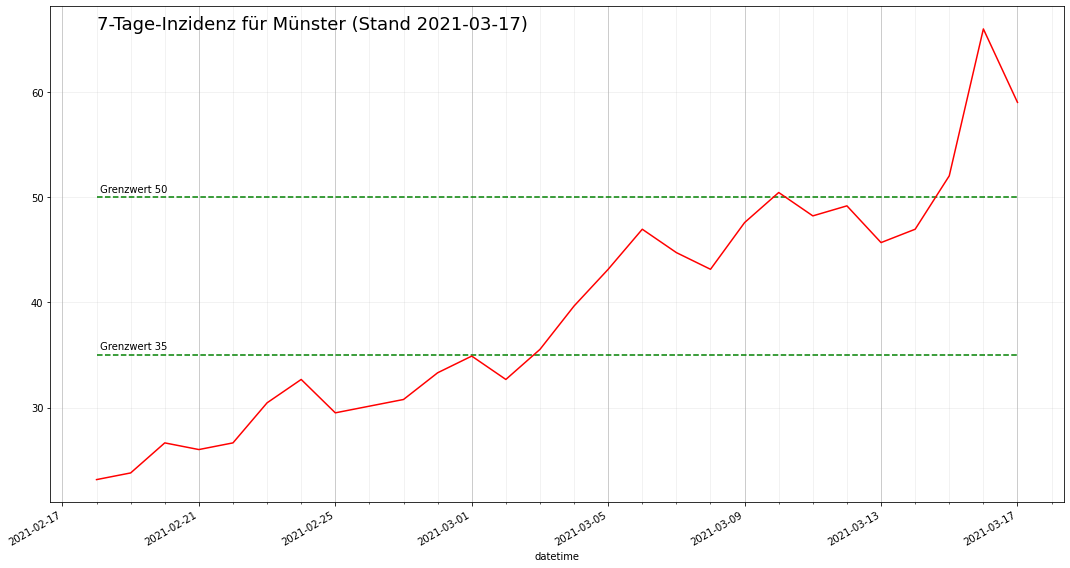

In [14]:
major_ticks = np.arange(0, 101, 7)
minor_ticks = np.arange(0, 101, 1)

ax = df_last.plot(y=[kennwert], color="red", figsize=(15,8), x_compat=True, grid=True, legend=False)

ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.grid(True, which='major', alpha=0.8)
ax.xaxis.grid(True, which='minor', alpha=0.2)
ax.yaxis.grid(True, which='both', alpha=0.2)

ymin, ymax = df_last[kennwert].min() - 10, df_last[kennwert].max() + 10
start, end, mid = df_last.index.min(), df_last.index.max(), df_last.index.mean()

levels =  {
    35: 35,
    50: 50,
    100: 100
}

for key in levels:
    if (levels[key] > ymin and levels[key] < ymax):
        ax.hlines(levels[key], start, end, linestyles='dashed', color="green")
        ax.annotate(f' Grenzwert %s' % key, (start, levels[key] + 0.5))

last_date = df_last.tail(1)["datumstd"].iloc[0]
ax.annotate(f'7-Tage-Inzidenz für %s (Stand %s)' % (region_label, last_date), (start, ymax - 10), fontsize=18,
            horizontalalignment='left')
        
#plt.subplots_adjust(left=0.3, right=0.3, top=0.3, bottom=0.3)
plt.tight_layout()
plt.show()

In [12]:
fig = ax.get_figure()
fig.savefig(output_file)